In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [25]:
with open('negacio_test_v2024.json') as f:
    test_data = json.load(f)
    
with open('negacio_train_v2024.json') as f:
    train_data = json.load(f)

In [26]:
def label_count(data): 
    labels = []

    # Iterar sobre los datos

    for item in data:
        # Obtener las etiquetas de los resultados de predicción
        predictions = item['predictions']
        for prediction in predictions:
            results = prediction['result']
            for result in results:
                value = result['value']
                labels.extend(value['labels'])

    # Contar la frecuencia de cada etiqueta
    label_counts = pd.Series(labels).value_counts()

    # Convertir la Serie a DataFrame
    label_counts_df = label_counts.reset_index().rename(columns={'index': 'Etiqueta', 0: 'count'})

    # Imprimir el DataFrame para ver si contiene los datos esperados
    print(label_counts_df, '\n')
    return label_counts_df


In [27]:
label_counts_test = label_count(test_data)
label_counts_train = label_count(train_data)

  Etiqueta  count
0      NEG   1132
1     NSCO   1074
2      UNC    131
3     USCO    129 

  Etiqueta  count
0      NEG   4307
1     NSCO   4103
2      UNC    458
3     USCO    451 



In [28]:
def df2list(labels):
    etiquetas = labels['Etiqueta'].tolist()
    frecuencias = labels['count'].tolist()
    return etiquetas, frecuencias

In [29]:
etiquetas_test, frequencias_test = df2list(label_counts_test)
etiquetas_train, frequencias_train = df2list(label_counts_train)

In [30]:
def plotting(etiquetas, frecuencias):
    plt.figure(figsize=(10, 6))
    plt.bar(etiquetas, frecuencias, color='skyblue')
    plt.title('Distribución de las etiquetas')
    plt.xlabel('Etiqueta')
    plt.ylabel('Frecuencia')
    plt.show()

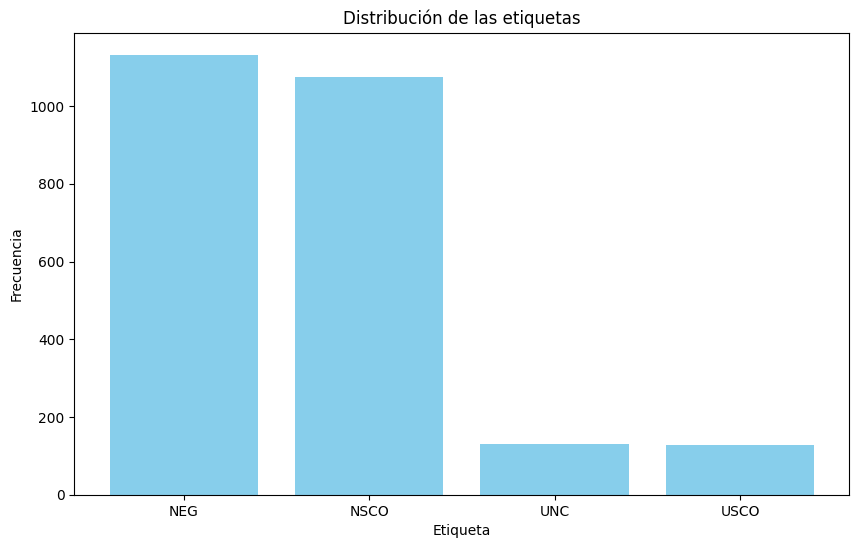

In [56]:
plotting(etiquetas_test, frequencias_test)

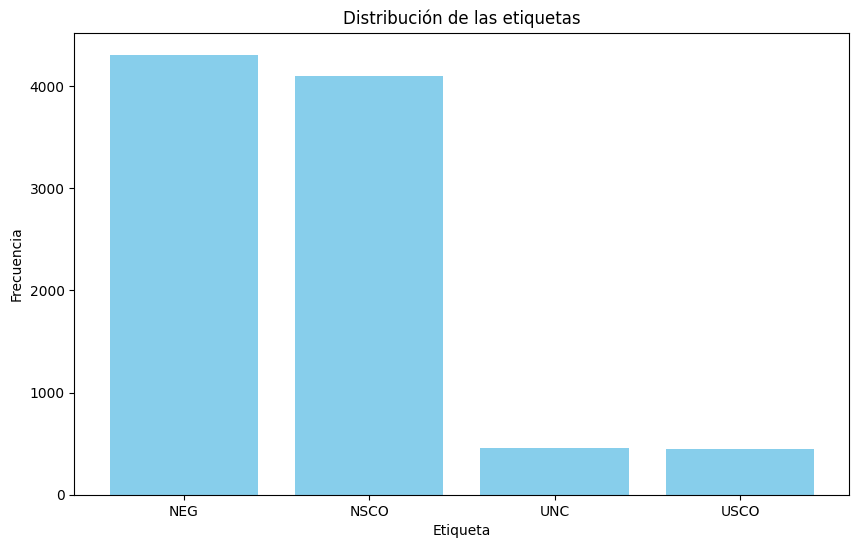

In [55]:
plotting(etiquetas_train, frequencias_train)

In [32]:
def load2df(data):
    # Cargar los datos en un DataFrame de Pandas
    df = pd.DataFrame(data)

    # Mostrar las primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    print(df.head())

    # Información sobre el DataFrame
    print("\nInformación del DataFrame:")
    print(df.info())

    # Resumen estadístico del DataFrame
    print("\nResumen estadístico del DataFrame:")
    print(df.describe())


In [35]:
load2df(test_data)

Primeras filas del DataFrame:
                                                data annotations  \
0  {'cmbd': 'null', 'id': '20306671', 'docid': 'n...          []   
1  {'cmbd': 'null', 'id': '18567026', 'docid': 'n...          []   
2  {'cmbd': 'null', 'id': '19114131', 'docid': 'n...          []   
3  {'cmbd': 'null', 'id': '20301648', 'docid': 'n...          []   
4  {'cmbd': 'null', 'id': '20097170', 'docid': 'n...          []   

                                         predictions  
0  [{'result': [{'value': {'start': 395, 'end': 3...  
1  [{'result': [{'value': {'start': 377, 'end': 3...  
2  [{'result': [{'value': {'start': 621, 'end': 6...  
3  [{'result': [{'value': {'start': 692, 'end': 6...  
4  [{'result': [{'value': {'start': 467, 'end': 4...  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         6

In [36]:
load2df(train_data)

Primeras filas del DataFrame:
                                                data annotations  \
0  {'cmbd': 'null', 'id': '19026587', 'docid': 'n...          []   
1  {'cmbd': 'null', 'id': '20331067', 'docid': 'n...          []   
2  {'cmbd': 'null', 'id': '18843029', 'docid': 'n...          []   
3  {'cmbd': 'null', 'id': '19754837', 'docid': 'n...          []   
4  {'cmbd': 'null', 'id': '18974947', 'docid': 'n...          []   

                                         predictions  
0  [{'result': [{'value': {'start': 449, 'end': 4...  
1  [{'result': [{'value': {'start': 351, 'end': 3...  
2  [{'result': [{'value': {'start': 395, 'end': 3...  
3  [{'result': [{'value': {'start': 416, 'end': 4...  
4  [{'result': [{'value': {'start': 719, 'end': 7...  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data        

In [47]:
def list_creator(data):
    # Crear listas para almacenar los textos y las etiquetas
    textos = []
    etiquetas = []

    # Iterar sobre los datos y extraer los textos y las etiquetas
    for item in data:
        data = item['data']
        predictions = item['predictions']
        
        # Extraer el texto del campo 'text' en 'data'
        texto = data['text']
        textos.append(texto)
        
        # Extraer las etiquetas de cada predicción y concatenarlas
        etiquetas_prediccion = [result['value']['labels'] for prediction in predictions for result in prediction['result']]
        etiquetas.append(etiquetas_prediccion)

    # Crear un DataFrame con los textos y las etiquetas
    df = pd.DataFrame({'Texto': textos, 'Etiquetas': etiquetas})

    # Mostrar las primeras filas del DataFrame
    print(df.head())
    return df


In [48]:
df_train = list_creator(train_data)

                                               Texto  \
0   nº historia clinica: ** *** *** nºepisodi: **...   
1   nº historia clinica: ** *** *** nºepisodi: **...   
2   nº historia clinica: ** *** *** nºepisodi: **...   
3   nº historia clinica: ** *** *** nºepisodi: **...   
4   nº historia clinica: ** *** *** nºepisodi: **...   

                                           Etiquetas  
0  [[NEG], [NSCO], [NSCO], [NEG], [NSCO], [NEG], ...  
1  [[NEG], [NEG], [NEG], [NSCO], [NSCO], [NEG], [...  
2  [[NEG], [NEG], [NSCO], [NEG], [NSCO], [NEG], [...  
3  [[NEG], [NEG], [NEG], [NEG], [NEG], [NSCO], [U...  
4  [[NEG], [NSCO], [NEG], [NSCO], [NEG], [NSCO], ...  


In [49]:
df_test = list_creator(test_data)

                                               Texto  \
0   nº historia clinica: ** *** *** nºepisodi: **...   
1   nº historia clinica: ** *** *** nºepisodi: **...   
2   nº historia clinica: ** *** *** nºepisodi: **...   
3   nº historia clinica: ** *** *** nºepisodi: **...   
4   nº historia clinica: ** *** *** nºepisodi: **...   

                                           Etiquetas  
0  [[NEG], [NSCO], [NEG], [NSCO], [NSCO], [NEG], ...  
1  [[NEG], [NEG], [NEG], [NEG], [NEG], [NEG], [NE...  
2  [[NEG], [NEG], [UNC], [USCO], [NEG], [NEG], [N...  
3  [[UNC], [USCO], [NEG], [NSCO], [NEG], [NEG], [...  
4  [[NEG], [UNC], [USCO], [NEG], [NEG], [NEG], [N...  


In [52]:
def lenght_visualization(df):
    # Visualizar la longitud de los textos
    plt.figure(figsize=(10, 6))
    df['Longitud_Texto'] = df['Texto'].apply(len)
    plt.hist(df['Longitud_Texto'], bins=50, color='skyblue')
    plt.title('Distribución de la longitud de los textos')
    plt.xlabel('Longitud del texto')
    plt.ylabel('Frecuencia')
    plt.show()

    # Ejemplo de visualizar algunos textos con sus etiquetas
    for i in range(5):
        print(f"Texto {i+1}:\n{df['Texto'][i]}")
        print(f"Etiquetas: {df['Etiquetas'][i]}")
        print()


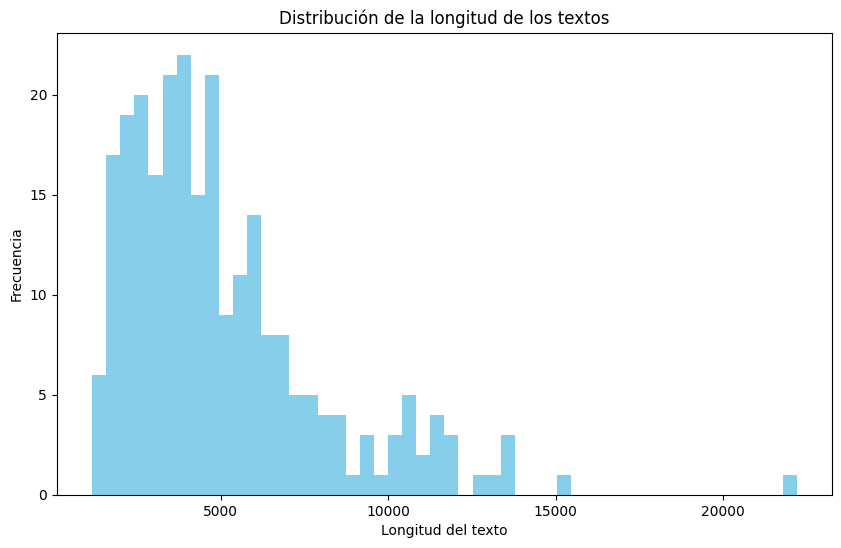

Texto 1:
 nº historia clinica: ** *** *** nºepisodi: ******** sexe: home data de naixement: 16.05.1936 edat: 82 anys procedencia cex mateix hosp servei urologia data d'ingres 24.07.2018 data d'alta 25.07.2018 08:54:04 ates per ***************, *****; ****************, ****** informe d'alta d'hospitalitzacio motiu d'ingres paciente que ingresa de forma programada para realizacion de uretrotomia interna . antecedents alergia a penicilina y cloramfenicol . no habitos toxicos. antecedentes medicos: bloqueo auriculoventricular de primer grado hipertension arterial. diverticulosis extensa insuficiencia renal cronica colelitiasis antecedentes quirurgicos: exeresis de lesiones cutaneas con anestesia local protesis total de cadera cordectomia herniorrafia inguinal proces actual varon de 81a que a raiz de episodio de hematuria macroscopica se realiza cistoscopia que es negativa para lesiones malignas pero se objetiva estenosis de uretra . se intentan dilataciones progresivas en el gabinete de ur

In [53]:
lenght_visualization(df_train)

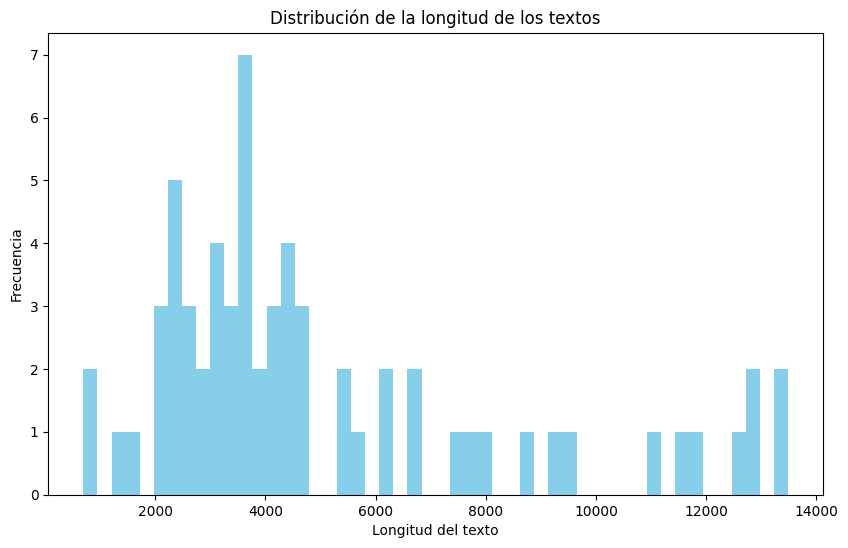

Texto 1:
 nº historia clinica: ** *** *** nºepisodi: ******** sexe: dona data de naixement: 12.05.1977 edat: 42 anys procedencia aguts servei obstetricia data d'ingres 27.09.2019 data d'alta 01.10.2019 13:00:00 ates per *****************, **************; *****************, ***** informe d'alta d'hospitalitzacio motiu d'ingres induccion al parto por pequeño para la edad gestacional ( peg ) antecedents no alergias medicamentosas conocidas antcededentes medico-quirurgicos: protesis mamaria, adenoidectomia niega habitos toxicos medicacio habitual anafranil25 mg/ diario. yodocefol. hierro oral. ranitidina 150 mg. proces actual edad: 42 años tpal: 1001 (eutocico) fur: 21.12.2019 sg: 40+0 gsrh:a+ gestacion controlada en alto riesgo obstetrico (aro) por antecedente de depresion postparto + diabetes gestacional ( dga1 ) + pequeño para la edad gestacional (peg) secundigesta de 40 semanas que ingresa para induccion por feto pequeño para la edad gestacional (peg). resumen gestacional - as 1 t: hb:

In [54]:
lenght_visualization(df_test)